In [ ]:
#SENTIMENT ANALYSIS ON TWEETS MADE FROM A TWITTER ACCOUNT (USES THE TWITTER API TO PULL THE TWEETS FOR ANALYSYS)



In [ ]:
# Import the libraries
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#API keys 
consumerKey = 'ZgsEQ0PM2euRdJHyfrMIGdWBM'
consumerSecret = 'rcO5BwZPc7SEeXCAAxSm5CWXOpXiixvAlRqdNy7E7Qz64qkWGG'
accessToken = '1229731149414531072-HDN1aMjvmnlw2hsVuEEgUaBPxNrqvP'
accessTokenSecret = 'vRkVl95HuslQS0X7hFHZpfQwGk4MydT2IgpDhiNSKbZOn'


In [ ]:
#auth 
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

In [ ]:
#api obj 
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
#select account & retrieve last 100 tweets
screen_name = input("please enter the @ of the user you want to analyse: ")
posts = api.user_timeline(screen_name, count = 100, lang ="en", tweet_mode="extended")

please enter the @ of the user you want to analyseBorisJohnson


In [ ]:
#test by showing last 10 tweets 
print("Show the 10 recent tweets:\n")
i=1
for tweet in posts[:10]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

Show the 10 recent tweets:

1) Today I am thinking of the men who landed on the beaches of Normandy 76 years ago, who fought and died so that we can be free from the evils of fascism. 

We will always be grateful for their courage, and we will always remember their sacrifice.

#DDay76 #DDay https://t.co/a7WgvK6s8j

2) Thank you for all you have been doing to fight the spread of this virus, and to protect our NHS.
 
We can beat this together. https://t.co/gXdlVGsxyc

3) If you are contacted by an NHS contract tracer who tells you that you have been in contact with someone who has tested positive, you must self-isolate for 14 days.
 
If everyone follows these guidelines, we can control the spread of the virus, protect our NHS and save lives. 2/2

4) If you have coronavirus symptoms (a high temperature, a new continuous cough, or a loss or change to sense of taste or smell) you need to self-isolate and get tested.

There is plenty of capacity and anyone with symptoms is eligible. Order a 

,Tweets
0,Today I am thinking of the men who landed on t...
1,Thank you for all you have been doing to fight...
2,If you are contacted by an NHS contract tracer...
3,If you have coronavirus symptoms (a high tempe...
4,"RT @10DowningStreet: On #WorldEnvironmentDay, ..."


In [ ]:
#clean tweets from: @,RT,#,HTTPS links
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 return text

In [ ]:
# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [ ]:
#subjectivity of text 
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

In [ ]:
# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [ ]:
# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df

,Tweets,Subjectivity,Polarity
0,Today I am thinking of the men who landed on t...,0.800000,0.400000
1,Thank you for all you have been doing to fight...,0.000000,0.000000
2,If you are contacted by an NHS contract tracer...,0.545455,0.227273
3,If you have coronavirus symptoms (a high tempe...,0.497273,0.148182
4,"@10DowningStreet: On WorldEnvironmentDay, we'r...",0.900000,0.300000
...,...,...,...
95,Do you want to ask me a question at today’s Do...,0.000000,0.000000
96,Read my full remarks from this evening here: \...,0.550000,0.350000
97,Though the UK will be changed by this experien...,0.520833,0.437500
98,When I think of the millions of everyday acts ...,0.311111,0.016667


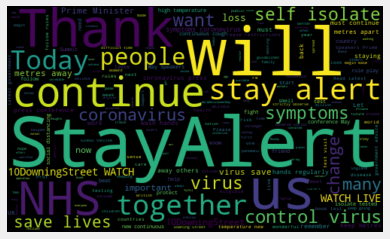

In [ ]:
#plotting the word cloud
allWords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500,height=300, random_state=21,max_font_size =100).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#function which sorts tweets by score 
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Netural'
  else: 
    return 'positive'
#apply function to the polatiry score df 
df['Analysis'] = df['Polarity'].apply(getAnalysis)
#show new df 
df    
      

,Tweets,Subjectivity,Polarity,Analysis
0,Today I am thinking of the men who landed on t...,0.800000,0.400000,positive
1,Thank you for all you have been doing to fight...,0.000000,0.000000,Netural
2,If you are contacted by an NHS contract tracer...,0.545455,0.227273,positive
3,If you have coronavirus symptoms (a high tempe...,0.497273,0.148182,positive
4,"@10DowningStreet: On WorldEnvironmentDay, we'r...",0.900000,0.300000,positive
...,...,...,...,...
95,Do you want to ask me a question at today’s Do...,0.000000,0.000000,Netural
96,Read my full remarks from this evening here: \...,0.550000,0.350000,positive
97,Though the UK will be changed by this experien...,0.520833,0.437500,positive
98,When I think of the millions of everyday acts ...,0.311111,0.016667,positive


In [ ]:
#percentage of postitive
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

0.0

In [ ]:
#percenatage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets 

round((ntweets.shape[0] / df.shape[0])*100,1)

6.0

In [ ]:
#score of each label
df['Analysis'].value_counts()

positive    68
Netural     26
Negative     6
Name: Analysis, dtype: int64

In [ ]:
#plotting 